In [1]:
import torch, pickle
from torch.utils.data import Dataset, DataLoader
from utils.PreProc_Data.DataProc import StackedSequenceDataset
import numpy as np
from utils.Eval_MZA import Eval_MZA
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
torch.cuda.empty_cache()
exp_dir   = "Trained_Models"  #Experiment Directory
exp_name  = "sl64_nhu40_nl1_bs16_2"             #One of the experiment names

eval_mza = Eval_MZA(exp_dir, exp_name)

In [7]:
epoch_num = 80
eval_mza.load_weights(epoch_num)

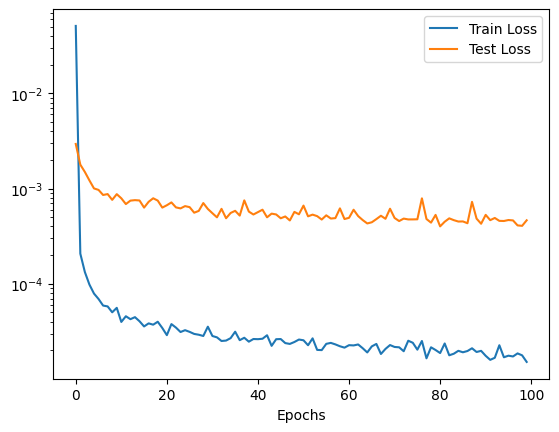

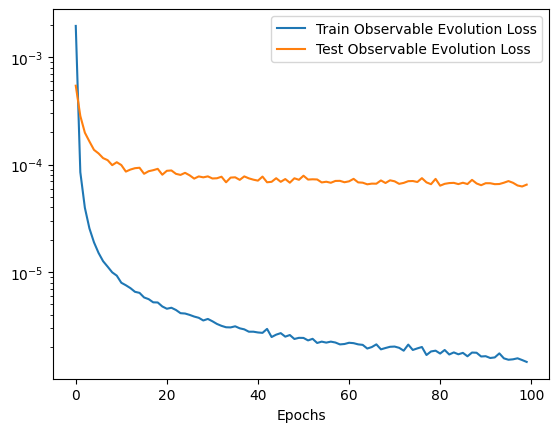

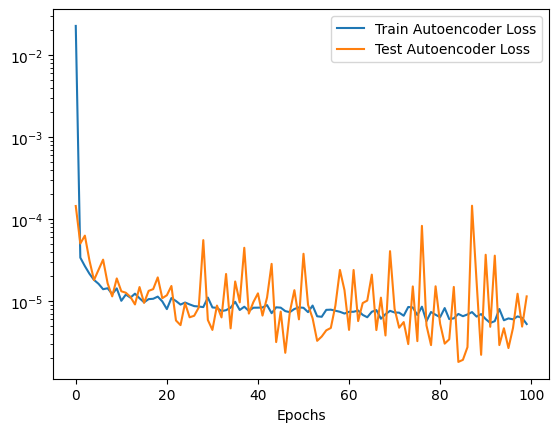

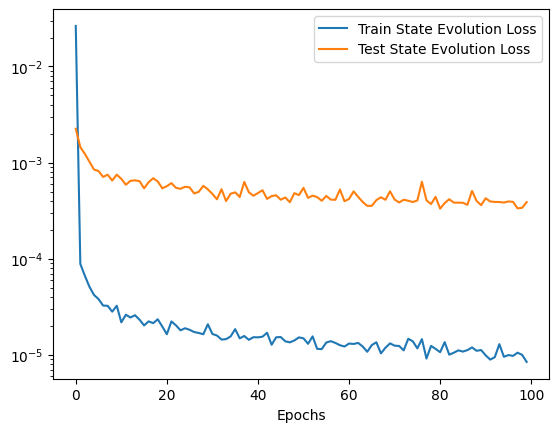

In [8]:
#plot learning curves
eval_mza.plot_learning_curves()

In [9]:
eval_mza.train_size = 0.95
eval_mza.create_dataset(mode = "Test")
del eval_mza.lp_data 
torch.cuda.empty_cache()
# del eval_mza.train_dataset
# del eval_mza.train_dataloader
dataset = eval_mza.test_dataset
num_trajs = eval_mza.test_num_trajs
x_nn_hat, Phi_nn_hat, Phi_nn, State_MSE = eval_mza.predict_onestep(dataset, num_trajs)

print(x_nn_hat.shape, Phi_nn_hat.shape, Phi_nn.shape)

#Plotting one step prediction

for i in range (1):
    plt.figure()
    plt.plot(Phi_nn_hat.cpu().numpy()[i,:,0], Phi_nn_hat.cpu().numpy()[i,:,1], label = "Predicted")
    plt.plot(Phi_nn.cpu().numpy()[i,:,0], Phi_nn.cpu().numpy()[i,:,1], label = "Target")
    plt.legend()

plt.figure()
plt.semilogy(State_MSE.cpu().numpy())
plt.xlabel("Timesteps")
plt.ylabel("MSE")

Test_Shape:  (23, 120, 2)


/home/pg221/anaconda3/envs/KS/lib/python3.10/site-packages/torch/nn/modules/rnn.py:774: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at /opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/cudnn/RNN.cpp:968.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


OutOfMemoryError: CUDA out of memory. Tried to allocate 550.00 MiB (GPU 0; 15.75 GiB total capacity; 420.65 MiB already allocated; 343.94 MiB free; 434.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [5]:
#multistep prediction
timesteps = 120
initial_conditions = Phi_nn[:,0].to(eval_mza.device)
x_hat, Phi_hat = eval_mza.predict_multistep(initial_conditions, timesteps)

print(x_hat.shape, Phi_hat.shape)


torch.Size([89, 121, 64]) torch.Size([89, 121, 2])


In [6]:
for i in range (1):
    plt.figure()
    plt.plot(Phi_nn.cpu().numpy()[i,:,0], Phi_nn.cpu().numpy()[i,:,1], '-', label = "Target")
    plt.plot(Phi_hat.cpu().numpy()[i,:,0], Phi_hat.cpu().numpy()[i,:,1], '-', label = "Predicted")
    plt.legend()



NameError: name 'Phi_nn' is not defined

<Figure size 640x480 with 0 Axes>

: 

torch.Size([89, 120, 2]) torch.Size([89, 121, 2])


Text(0, 0.5, 'MSE')

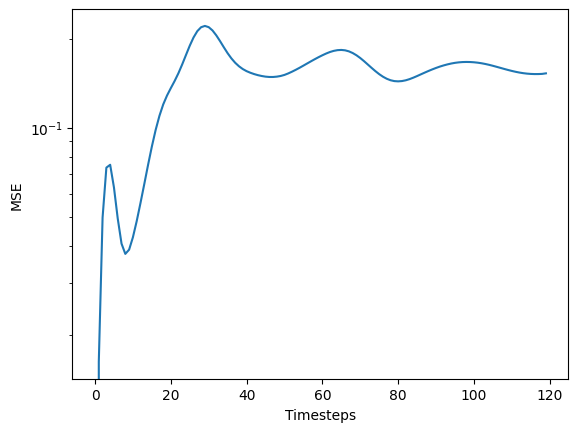

In [9]:
print(Phi_nn.shape, Phi_hat.shape)
State_MSE_multistep = Eval_MZA.state_mse(Phi_nn,Phi_hat[:,:120])
plt.figure()
plt.semilogy(State_MSE_multistep.detach().cpu().numpy())
plt.xlabel("Timesteps")
plt.ylabel("MSE")

Text(0.5, 0, 'Epochs')

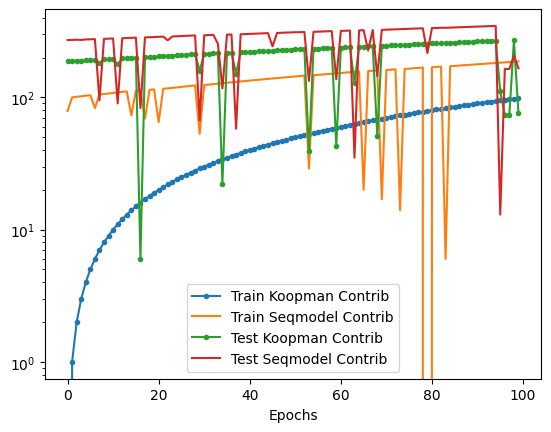

In [15]:
plt.figure()
plt.semilogy(df['epoch'],df['Train_koop_ptg'], '.-',label="Train Koopman Contrib")
plt.semilogy(df['epoch'],df['Train_seqmodel_ptg'], label="Train Seqmodel Contrib")

plt.semilogy(df['epoch'], df['Test_koop_ptg'], '.-',label="Test Koopman Contrib")
plt.semilogy(df['epoch'], df['Test_seqmodel_ptg'], label="Test Seqmodel Contrib")

plt.legend()
# plt.savefig(self.exp_dir+'/'+self.exp_name+"/out_log/")
plt.xlabel("Epochs")

<Figure size 640x480 with 0 Axes>

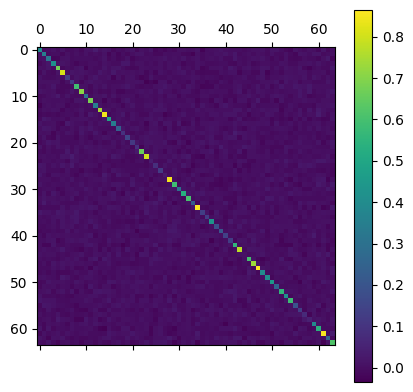

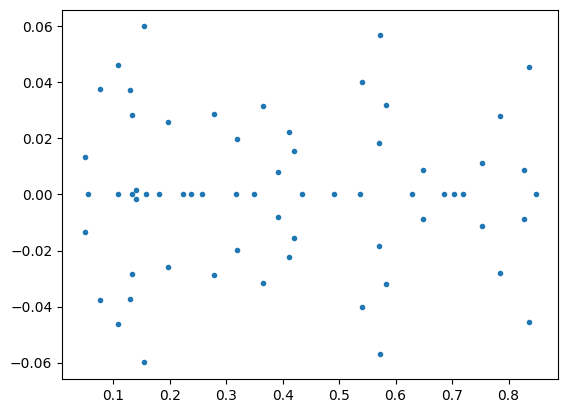

In [54]:
mat = eval_mza.model.koopman.getKoopmanMatrix()
mat = mat.detach().cpu().numpy()
w, v = np.linalg.eig(mat)

idx = w.argsort()[::-1]
w = w[idx]
v = v[:,idx]

plt.figure()
plt.matshow(mat)
plt.colorbar()

plt.figure()
plt.plot(np.real(w), np.imag(w), ".")

In [55]:
print(w)

[0.84765905+0.j         0.83686703+0.04548275j 0.83686703-0.04548275j
 0.8275889 +0.00881426j 0.8275889 -0.00881426j 0.78484535+0.02804168j
 0.78484535-0.02804168j 0.7534628 +0.01107765j 0.7534628 -0.01107765j
 0.7197688 +0.j         0.70395637+0.j         0.686192  +0.j
 0.6487706 +0.00889667j 0.6487706 -0.00889667j 0.62835515+0.j
 0.583415  +0.03177753j 0.583415  -0.03177753j 0.57315576+0.05676952j
 0.57315576-0.05676952j 0.5700508 +0.01823834j 0.5700508 -0.01823834j
 0.5402279 +0.04006736j 0.5402279 -0.04006736j 0.5367988 +0.j
 0.49075386+0.j         0.43369484+0.j         0.41977182+0.01545396j
 0.41977182-0.01545396j 0.4115268 +0.02222101j 0.4115268 -0.02222101j
 0.39214107+0.00811996j 0.39214107-0.00811996j 0.36597553+0.03147557j
 0.36597553-0.03147557j 0.34992874+0.j         0.31987566+0.01994098j
 0.31987566-0.01994098j 0.31733558+0.j         0.2786247 +0.02872875j
 0.2786247 -0.02872875j 0.2581926 +0.j         0.23851885+0.j
 0.22396664+0.j         0.19746415+0.02580767j 0.197

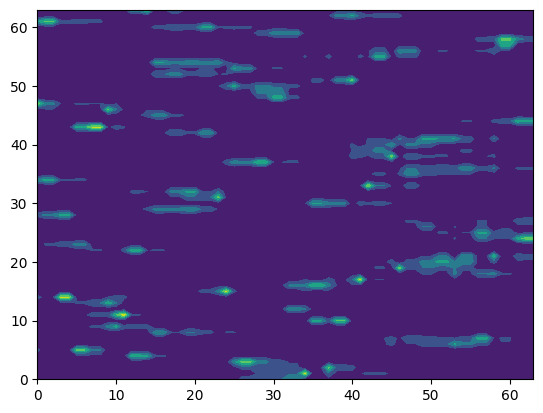

In [56]:
plt.contourf(abs(v))